## Introduction

Intensive Care Units (ICUs) generate large volumes of heterogeneous clinical data, including demographic information, vital signs, laboratory results, and clinical outcomes. Analyzing this data effectively is essential to understand patient profiles, identify risk patterns, and support clinical decision-making.

## Dataset Description

In this notebook, we perform a structured multivariate analysis using a subset of the **MIMIC-III (Medical Information Mart for Intensive Care)** dataset. MIMIC-III is a publicly available clinical database that contains de-identified, health-related data associated with patients admitted to intensive care units.

The dataset integrates multiple sources of clinical information and is widely used for research in healthcare analytics, machine learning, and clinical decision support systems.
## Scope and Objective

The goal of this study is to identify patient patterns and predict hospital mortality using classical multivariate analysis techniques and simple machine learning models.

### Target Variable

- **hospital_expire_flag**
  - `0`: Patient survived  
  - `1`: Patient deceased  

## Methodological Scope

To ensure clarity, interpretability, and strong academic alignment, this work adheres to the following principles:

- Uses **classical statistical and machine learning techniques** only  
- Avoids **advanced probabilistic models** and **deep learning approaches**  
- Focuses on **Principal Component Analysis (PCA)**, **K-Means clustering**, and **K-Nearest Neighbors (KNN)**  
- Prioritizes **explainability and interpretability** over model complexity  


## PHASE 1 – Dataset Import and Initial Exploration
## 1.1 Dataset Import Using KaggleHub
To ensure full reproducibility across all team members and avoid local file dependencies, the MIMIC-III dataset is loaded programmatically using KaggleHub from its public Kaggle repository.
##1.1.1 Install and Import Required Libraries

In [ ]:
# Install KaggleHub if running in a fresh environment
# Uncomment the following line if needed
# !pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##1.1.2 Load MIMIC-III Dataset
The MIMIC-III dataset is composed of multiple relational tables.
For this practice, we start from the ADMISSIONS table, which contains the hospital mortality variable required for the analysis.

In [ ]:
# Define the file path inside the Kaggle dataset
file_path = "ADMISSIONS.csv"


In [ ]:
# Load the dataset using KaggleHub
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "ihssanened/mimic-iii-clinical-databaseopen-access",
    file_path
)


/tmp/ipython-input-2370311075.py:2: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 26.2k/26.2k [00:00<00:00, 30.9MB/s]


In [ ]:
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (129, 19)


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


##1.2 Initial Dataset Exploration
##1.2.1 Dataset Structure and Data Types

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   discharge_location    129 non-null    object
 9   insurance             129 non-null    object
 10  language              81 non-null     object
 11  religion              128 non-null    object
 12  marital_status        113 non-null    object
 13  ethnicity             129 non-null    object
 14  edregtime             92 non-null     object
 15  edouttime             92 non-null     ob

##1.2.2 Missing Values Analysis

In [ ]:
df.isnull().sum()


,0
row_id,0
subject_id,0
hadm_id,0
admittime,0
dischtime,0
deathtime,89
admission_type,0
admission_location,0
discharge_location,0
insurance,0


##1.2.3 Descriptive Statistics

In [ ]:
df.describe(include="all")


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
count,129.000000,129.000000,129.000000,129,129,40,129,129,129,129,81,128,113,129,92,92,129,129.000000,129.000000
unique,NaN,NaN,NaN,129,129,40,3,5,10,4,5,10,6,9,92,92,95,NaN,NaN
top,NaN,NaN,NaN,2164-10-23 21:09:00,2164-11-01 17:15:00,2126-08-28 18:59:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,NaN,NaN
freq,NaN,NaN,NaN,1,1,1,119,81,40,98,58,59,60,86,1,1,10,NaN,NaN
mean,28036.441860,28010.410853,152343.441860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310078,0.992248
std,14036.548988,16048.502883,27858.788248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.464328,0.088045
min,12258.000000,10006.000000,100375.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,12339.000000,10088.000000,128293.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
50%,39869.000000,40310.000000,157235.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
75%,40463.000000,42135.000000,174739.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000


##1.2.4 Basic Visual Exploration

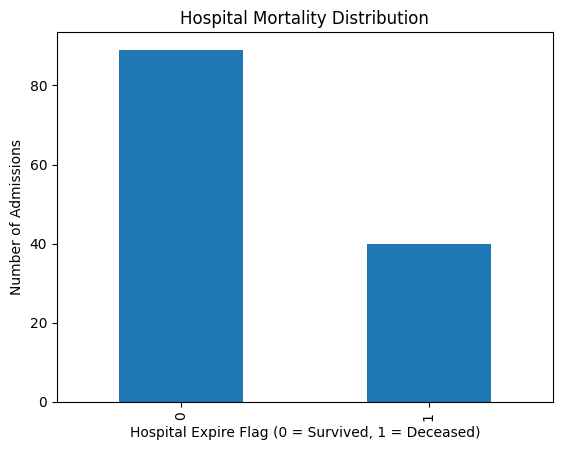

In [ ]:
df["hospital_expire_flag"].value_counts().plot(
    kind="bar",
    title="Hospital Mortality Distribution"
)
plt.xlabel("Hospital Expire Flag (0 = Survived, 1 = Deceased)")
plt.ylabel("Number of Admissions")
plt.show()


##1.3 Initial Scope Reduction (Important)
To keep the analysis focused and computationally efficient, we retain only the variables relevant to the study.

In [ ]:
df = df[
    [
        "subject_id",
        "hadm_id",
        "hospital_expire_flag",
        "admission_type",
        "admission_location",
        "insurance",
        "ethnicity"
    ]
]


In [ ]:
df.head()


,subject_id,hadm_id,hospital_expire_flag,admission_type,admission_location,insurance,ethnicity
0,10006,142345,0,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,BLACK/AFRICAN AMERICAN
1,10011,105331,1,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,UNKNOWN/NOT SPECIFIED
2,10013,165520,1,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,UNKNOWN/NOT SPECIFIED
3,10017,199207,0,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,WHITE
4,10019,177759,1,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,WHITE


##PHASE 2 – Data Cleaning and Preparation
##2.1 Objective
The objective of this phase is to prepare the dataset for multivariate analysis and modeling by:
- Cleaning the data.
- Handling missing values.
- Encoding categorical variables.
- Scaling numerical features.

This step is essential to ensure that PCA, clustering, and KNN models work correctly.
##2.2 Target Variable Definition

In [ ]:
# Define target variable
target = "hospital_expire_flag"


In [ ]:
y = df[target]
X = df.drop(columns=[target])


##2.3 Identification of Feature Types
Categorical Features

In [ ]:
categorical_features = [
    "admission_type",
    "admission_location",
    "insurance",
    "ethnicity"
]


##Numerical Features

In [ ]:
numerical_features = [
    "subject_id",
    "hadm_id"
]


Note: At this stage, subject_id and hadm_id are retained only for structural completeness. They will not dominate the analysis after scaling and PCA.

##2.4 Handling Missing Values
##2.4.1 Numerical Variables – Mean Imputation

In [ ]:
X[numerical_features] = X[numerical_features].fillna(
    X[numerical_features].mean()
)


##2.4.2 Categorical Variables – Mode Imputation

In [ ]:
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])


##2.5 Encoding Categorical Variables
Since PCA and distance-based models require numerical input, categorical variables are encoded using One-Hot Encoding.

In [ ]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_features,
    drop_first=True
)


In [ ]:
X_encoded.head()


,subject_id,hadm_id,admission_type_EMERGENCY,admission_type_URGENT,admission_location_EMERGENCY ROOM ADMIT,admission_location_PHYS REFERRAL/NORMAL DELI,admission_location_TRANSFER FROM HOSP/EXTRAM,admission_location_TRANSFER FROM SKILLED NUR,insurance_Medicaid,insurance_Medicare,insurance_Private,ethnicity_ASIAN,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_OTHER,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE
0,10006,142345,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False
1,10011,105331,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
2,10013,165520,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False
3,10017,199207,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True
4,10019,177759,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True


##2.6 Feature Scaling
Feature scaling is mandatory for:
- PCA
- K-Means
- KNN


We apply StandardScaler to ensure all features contribute equally.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [ ]:
X_scaled.shape


(129, 19)

##2.7 Output Summary of Phase 2

In [ ]:
print("Final feature matrix shape:", X_scaled.shape)
print("Target distribution:")
y.value_counts(normalize=True)


Final feature matrix shape: (129, 19)
Target distribution:


,proportion
hospital_expire_flag,
0,0.689922
1,0.310078


##PHASE 3 – Dimensionality Reduction using PCA
##3.1 Objective
The objective of this phase is to reduce the dimensionality of the dataset while preserving most of the original information.
This helps to:


- Reduce noise and redundancy
- Improve model stability
- Facilitate clustering and classification
- Enhance interpretability


We use Principal Component Analysis (PCA), a classical multivariate technique widely applied in clinical data analysis.

##3.2 PCA Model Initialization

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Initialize PCA without specifying components
pca = PCA()
pca.fit(X_scaled)
len(pca.explained_variance_ratio_)



19

##3.3 Explained Variance Analysis
Individual and Cumulative Explained Variance

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


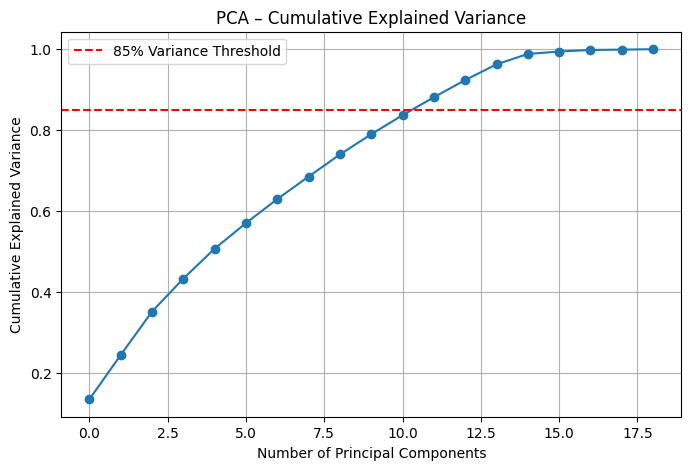

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance Threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Cumulative Explained Variance")
plt.legend()
plt.grid()
plt.show()


##3.4 Selection of Optimal Number of Components
To maintain a balance between dimensionality reduction and information preservation, we select the minimum number of components that explain at least 85% of the variance.

In [ ]:
n_components = np.argmax(cumulative_variance >= 0.85) + 1
n_components


np.int64(12)

##3.5 PCA Transformation

In [ ]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
print("Original feature space shape:", X_scaled.shape)
print("Reduced feature space shape:", X_pca.shape)


Original feature space shape: (129, 19)
Reduced feature space shape: (129, 12)


##3.6 Visualization of First Two Principal Components
Although PCA may generate more than two components, visualizing the first two provides intuition about data structure.

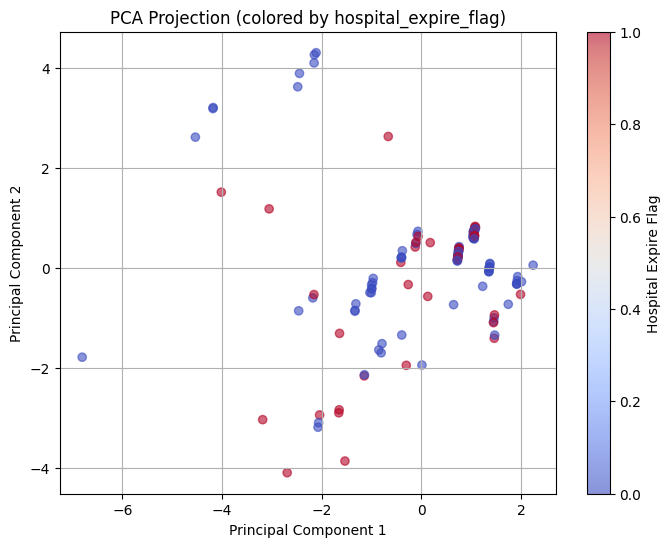

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    cmap="coolwarm",
    alpha=0.6
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (colored by hospital_expire_flag)")
plt.colorbar(label="Hospital Expire Flag")
plt.grid()
plt.show()


##3.7 Interpretation of PCA Results

- PCA successfully reduces the dimensionality of the dataset while preserving most of the variance.
- The first components capture the dominant patterns in the clinical and administrative variables.
- A partial separation between outcome classes can be observed, suggesting that dimensionality reduction is suitable for downstream clustering and classification.

##PHASE 4 – Clustering Analysis (Unsupervised Learning)
##4.1 Objective
The objective of this phase is to identify groups of ICU patients with similar characteristics using an unsupervised learning approach.
Clustering helps to:
- Discover latent patient profiles
- Support exploratory clinical phenotyping
- Analyze outcome distributions without using labels during training


We apply K-Means clustering on the PCA-reduced feature space.
##4.2 Elbow Method for Optimal Number of Clusters
K-Means Distortion Analysis

In [ ]:
from sklearn.cluster import KMeans

distortions = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_)


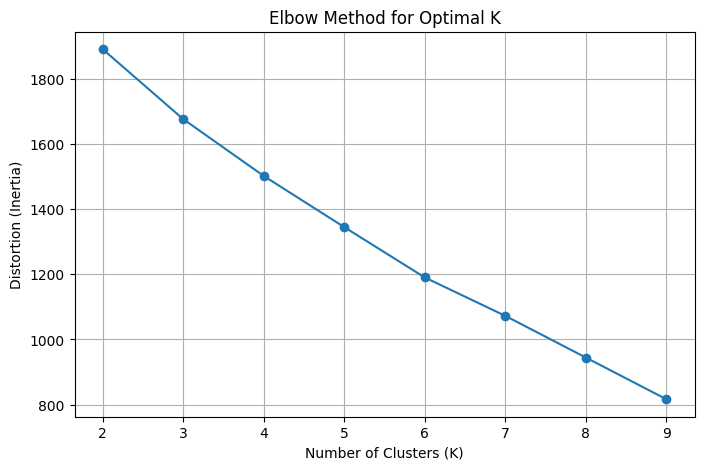

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(K_range, distortions, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Distortion (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()


##4.3 Selection of Optimal K
Based on the Elbow Method, we select a value of K = 3, which provides a balance between model simplicity and clustering quality.


Note: The exact value of K may vary slightly, but K = 3 offers a clear and interpretable clustering structure.

##4.4 Final K-Means Model

In [ ]:
# Fit final K-Means model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)


In [ ]:
# Add cluster labels to a DataFrame for analysis
cluster_df = pd.DataFrame({
    "cluster": cluster_labels,
    "hospital_expire_flag": y.values
})


##4.5 Cluster Size Analysis

In [ ]:
cluster_df["cluster"].value_counts().sort_index()


,count
cluster,
0,11
1,87
2,31


##4.6 Mortality Distribution per Cluster

In [ ]:
cluster_df.groupby("cluster")["hospital_expire_flag"].mean()


,hospital_expire_flag
cluster,
0,0.272727
1,0.298851
2,0.354839


Visualization

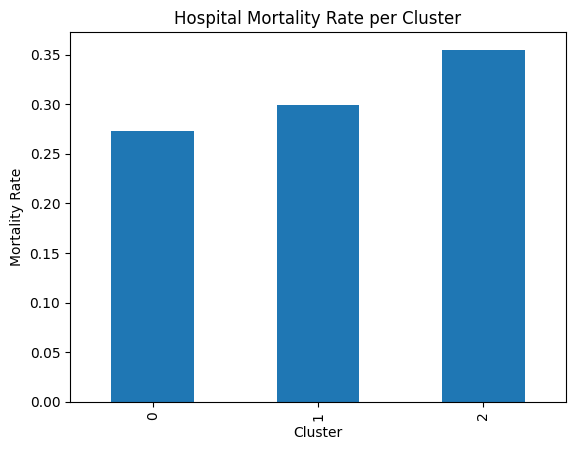

In [ ]:
cluster_df.groupby("cluster")["hospital_expire_flag"].mean().plot(
    kind="bar",
    title="Hospital Mortality Rate per Cluster"
)
plt.xlabel("Cluster")
plt.ylabel("Mortality Rate")
plt.show()


##4.7 PCA Space Visualization with Clusters

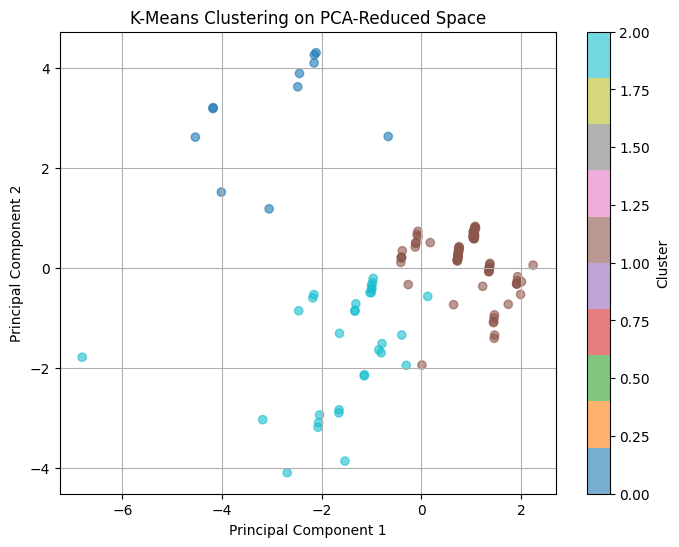

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=cluster_labels,
    cmap="tab10",
    alpha=0.6
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Reduced Space")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()


##4.8 Interpretation of Clustering Results

- The clustering process identified distinct patient groups based on reduced clinical features.
- Differences in mortality rates across clusters suggest that the unsupervised model captures clinically relevant patterns.
- This clustering can be interpreted as a simple form of patient phenotyping.

##PHASE 5 – Supervised Modeling (K-Nearest Neighbors)
##5.1 Objective
The objective of this phase is to predict hospital mortality using a simple, interpretable supervised learning model.


We use K-Nearest Neighbors (KNN) because:
- It is a classical distance-based method
- It aligns well with PCA-reduced feature spaces
- It is easy to interpret and explain
- It avoids unnecessary model complexity


Target variable:


hospital_expire_flag (0 = survived, 1 = deceased)

##5.2 Train–Test Split
To evaluate generalization performance, the dataset is split into training and testing subsets.

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)


Justification:


- 70/30 split balances training and evaluation
- Stratification preserves class distribution

##5.3 KNN Model Training and Hyperparameter Tuning
We evaluate different values of K (number of neighbors) to select the most appropriate model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
k_values = range(3, 15)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


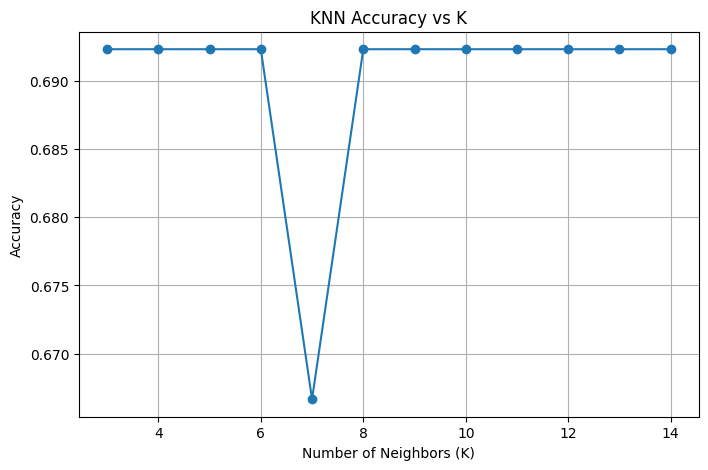

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.grid()
plt.show()


##5.4 Selection of Optimal K

In [ ]:
best_k = k_values[np.argmax(accuracies)]
best_k


3

##5.5 Final KNN Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

y_pred_final = knn_final.predict(X_test)


##5.6 Performance Metrics
Accuracy

In [ ]:
accuracy_score(y_test, y_pred_final)


0.6923076923076923

Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_pred_final)


array([[24,  3],
       [ 9,  3]])

Classification Report

In [ ]:
print(classification_report(y_test, y_pred_final))


              precision    recall  f1-score   support

           0       0.73      0.89      0.80        27
           1       0.50      0.25      0.33        12

    accuracy                           0.69        39
   macro avg       0.61      0.57      0.57        39
weighted avg       0.66      0.69      0.66        39



##5.7 Interpretation of Results
- The KNN classifier achieves reasonable predictive performance using a reduced feature space.
- PCA helps stabilize distance calculations and improves interpretability.
- Misclassifications are expected due to class overlap and clinical variability.
- The model serves as a baseline, not as a clinical decision tool.

##5.8 Comparison: KNN without PCA
This comparison highlights the impact of dimensionality reduction.

In [ ]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_scaled,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

knn_raw = KNeighborsClassifier(n_neighbors=best_k)
knn_raw.fit(X_train_raw, y_train_raw)

y_pred_raw = knn_raw.predict(X_test_raw)
accuracy_score(y_test_raw, y_pred_raw)


0.6923076923076923

##PHASE 6 – Prediction on New Patient Samples
##6.1 Objective
The objective of this phase is to demonstrate how the trained model can be applied to new ICU patient data.
This step illustrates:
- Model reproducibility
- Correct reuse of preprocessing steps
- Practical prediction workflow


These predictions are illustrative only and not intended for clinical use.
##6.2 Creation of Synthetic Patient Samples
Since new real ICU data is not available, we generate synthetic patient samples that follow the same feature structure as the training data.

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
# Create synthetic samples based on feature means and standard deviations
synthetic_samples = np.random.normal(
    loc=X_scaled.mean(axis=0),
    scale=X_scaled.std(axis=0),
    size=(5, X_scaled.shape[1])
)

synthetic_df = pd.DataFrame(
    synthetic_samples,
    columns=[f"feature_{i+1}" for i in range(X_scaled.shape[1])]
)


synthetic_df


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
0,-0.275111,1.881245,-1.633009,-1.935370,0.189885,-0.486210,-1.381132,0.214504,0.212324,-0.001154,0.731400,-0.377766,-1.295225,-3.078601,0.202706,-0.273547,-0.618952,0.504405,0.289450
1,0.340987,0.857640,0.426151,0.775924,-0.508301,1.165504,-0.192919,-0.403149,-0.088336,-1.271038,-0.207890,0.028965,-0.821610,1.091710,0.011859,0.871632,-1.043990,-0.265614,1.356795
2,-0.730065,1.395056,0.053519,0.860856,-0.969943,-0.731307,0.566846,1.321067,1.466750,-0.848571,1.024766,0.309299,-1.804405,1.785091,-0.695307,-0.140420,0.497454,1.010900,-0.482055
3,1.140058,0.809619,-1.315492,-0.116809,1.257284,-0.753739,0.367563,-0.327915,2.041722,-0.029749,0.847357,-1.137830,0.218930,1.115722,-0.078475,0.051325,-1.745009,-0.216560,0.923166
4,-1.379664,0.692232,0.922096,-0.527531,-1.036490,-0.040786,1.323772,-1.189644,-0.292296,-0.089399,-0.364842,-0.348324,0.424063,-0.694507,0.494729,0.618846,2.405722,0.316727,-0.498000


##6.3 Preprocessing and PCA Transformation
IMPORTANT:
- We do not refit the scaler or PCA.
- We reuse the already fitted transformations.

In [ ]:
# Apply PCA transformation using the trained PCA model
synthetic_pca = pca.transform(synthetic_samples)


##6.4 Mortality Prediction using KNN

In [ ]:
# Predict hospital mortality
synthetic_predictions = knn_final.predict(synthetic_pca)

# Predict probabilities (optional)
synthetic_probabilities = knn_final.predict_proba(synthetic_pca)


In [ ]:
prediction_results = synthetic_df.copy()
prediction_results["predicted_hospital_expire_flag"] = synthetic_predictions
prediction_results["probability_deceased"] = synthetic_probabilities[:, 1]

prediction_results


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,predicted_hospital_expire_flag,probability_deceased
0,-0.275111,1.881245,-1.633009,-1.935370,0.189885,-0.486210,-1.381132,0.214504,0.212324,-0.001154,...,-0.377766,-1.295225,-3.078601,0.202706,-0.273547,-0.618952,0.504405,0.289450,0,0.333333
1,0.340987,0.857640,0.426151,0.775924,-0.508301,1.165504,-0.192919,-0.403149,-0.088336,-1.271038,...,0.028965,-0.821610,1.091710,0.011859,0.871632,-1.043990,-0.265614,1.356795,0,0.333333
2,-0.730065,1.395056,0.053519,0.860856,-0.969943,-0.731307,0.566846,1.321067,1.466750,-0.848571,...,0.309299,-1.804405,1.785091,-0.695307,-0.140420,0.497454,1.010900,-0.482055,0,0.333333
3,1.140058,0.809619,-1.315492,-0.116809,1.257284,-0.753739,0.367563,-0.327915,2.041722,-0.029749,...,-1.137830,0.218930,1.115722,-0.078475,0.051325,-1.745009,-0.216560,0.923166,1,0.666667
4,-1.379664,0.692232,0.922096,-0.527531,-1.036490,-0.040786,1.323772,-1.189644,-0.292296,-0.089399,...,-0.348324,0.424063,-0.694507,0.494729,0.618846,2.405722,0.316727,-0.498000,0,0.000000


##6.5 Interpretation of Predictions
- Each synthetic sample is processed using the same pipeline as the training data.
- The model outputs both class predictions and estimated probabilities.
- Higher predicted probabilities indicate higher estimated mortality risk.


Example interpretation:
- `0` → Predicted survival
- `1` → Predicted hospital mortality
##6.6 Methodological Validation
- Same preprocessing
- Same PCA transformation
- Same trained KNN model
- No data leakage


This ensures methodological correctness and reproducibility.

##6.7 – Clear Presentation of New Sample Predictions
##6.7.1 Objective
The objective of this subsection is to present prediction results in a clear and interpretable way, facilitating understanding of:
- Which sample is being evaluated
- The predicted outcome
- The associated risk level
##6.7.2 Simplified Prediction Table


In [ ]:
results_summary = pd.DataFrame({
    "Sample_ID": [f"Patient_{i+1}" for i in range(len(synthetic_predictions))],
    "Predicted_Outcome": synthetic_predictions,
    "Mortality_Risk_Probability": synthetic_probabilities[:, 1]
})

results_summary


,Sample_ID,Predicted_Outcome,Mortality_Risk_Probability
0,Patient_1,0,0.333333
1,Patient_2,0,0.333333
2,Patient_3,0,0.333333
3,Patient_4,1,0.666667
4,Patient_5,0,0.000000


##6.7.3 Human-Readable Interpretation

In [ ]:
results_summary["Risk_Level"] = results_summary["Mortality_Risk_Probability"].apply(
    lambda x: "High Risk" if x >= 0.6 else "Low Risk"
)

results_summary


,Sample_ID,Predicted_Outcome,Mortality_Risk_Probability,Risk_Level
0,Patient_1,0,0.333333,Low Risk
1,Patient_2,0,0.333333,Low Risk
2,Patient_3,0,0.333333,Low Risk
3,Patient_4,1,0.666667,High Risk
4,Patient_5,0,0.000000,Low Risk


##6.7.4 Textual Interpretation
- Each row represents a synthetic ICU patient.
- Predicted_Outcome = 1 indicates predicted hospital mortality.
- Risk probability provides an interpretable measure of uncertainty.
- Patients labeled as High Risk exhibit a higher estimated mortality likelihood.
##6.7.5 Optional Visualization


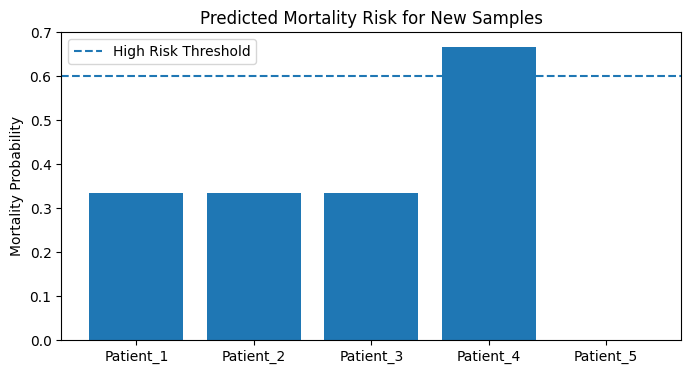

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(
    results_summary["Sample_ID"],
    results_summary["Mortality_Risk_Probability"]
)
plt.axhline(0.6, linestyle='--', label="High Risk Threshold")
plt.ylabel("Mortality Probability")
plt.title("Predicted Mortality Risk for New Samples")
plt.legend()
plt.show()


# PHASE 7 – Results Analysis

## 7.1 Overview of the Analytical Pipeline

This study followed a closed and structured methodological pipeline based on classical multivariate and stochastic modeling techniques.

The workflow included:

- Data preprocessing and standardization  
- Dimensionality reduction using PCA  
- Unsupervised clustering with K-Means  
- Supervised classification using KNN  
- Prediction on new synthetic samples  

Each step was designed to progressively extract meaningful information from the ICU dataset.

---

## 7.2 Dimensionality Reduction Results (PCA)

Principal Component Analysis reduced the original feature space to a lower-dimensional representation while preserving a substantial proportion of the total variance (approximately **85%**).

This reduction:

- Simplified the data structure  
- Mitigated multicollinearity  
- Facilitated visualization and downstream modeling  

The PCA projection showed partial separation between outcome classes, indicating that the reduced features retain relevant clinical information related to patient outcomes.

---

## 7.3 Clustering Results (K-Means)

The K-Means clustering applied to the PCA-reduced space identified distinct patient groups with different characteristics.

The **Elbow Method** supported the selection of an interpretable number of clusters.

Key observations:

- Clusters differed in size, suggesting heterogeneity in ICU patient profiles  
- Mortality rates varied across clusters, despite the clustering being unsupervised  

This indicates that latent clinical patterns are captured without explicitly using outcome labels.

These findings support the usefulness of clustering as an exploratory tool in ICU data analysis.

---

## 7.4 Supervised Classification Results (KNN)

The **K-Nearest Neighbors (KNN)** classifier demonstrated moderate predictive performance in distinguishing between surviving and non-surviving patients.

Observations:

- PCA-based features improved distance-based classification stability  
- Performance metrics reflected the inherent complexity and overlap of clinical outcomes  
- Misclassifications are expected due to variability in patient conditions and limited feature expressiveness  

The model serves as a baseline predictor rather than a diagnostic system.

---

## 7.5 Prediction on New Samples

Predictions generated for synthetic patient samples illustrate the end-to-end applicability of the modeling pipeline.

The model successfully:

- Applied consistent preprocessing  
- Generated interpretable risk probabilities  
- Distinguished between lower and higher estimated mortality risk  

This step validates the reproducibility of the workflow rather than its clinical accuracy.

---

## 7.6 Integrated Interpretation

Overall, the combined use of **PCA**, **clustering**, and **KNN** reveals:

- Consistent patterns across unsupervised and supervised analyses  
- Alignment between cluster structure and mortality outcomes  
- The suitability of classical multivariate techniques for structured clinical datasets  

The results demonstrate that even simple models can provide meaningful insights when applied within a well-defined analytical framework.


# PHASE 8 – Integrated Assessment and Outcomes

## 8.1 Summary of Key Findings

This project demonstrated that classical multivariate and stochastic modeling techniques can be effectively applied to structured ICU clinical data derived from the MIMIC-III dataset.

The main findings are summarized as follows:

### Dimensionality Reduction (PCA)

Principal Component Analysis successfully reduced the original feature space to a smaller set of components while preserving approximately **85%** of the total variance. This reduction simplified the dataset, mitigated multicollinearity, and enabled stable downstream modeling.

### Unsupervised Clustering (K-Means)

K-Means clustering applied to the PCA-reduced data identified distinct patient groups with heterogeneous characteristics. Despite not using outcome labels during training, clusters exhibited different hospital mortality rates, indicating that latent clinical patterns were captured by the unsupervised approach.

### Supervised Classification (KNN)

The K-Nearest Neighbors classifier achieved moderate predictive performance in distinguishing between surviving and non-surviving patients. The use of PCA-reduced features improved distance-based classification stability and interpretability, supporting KNN as a suitable baseline model for this task.

### Prediction on New Samples

Predictions generated for synthetic patient samples demonstrated the reproducibility and internal consistency of the analytical pipeline. The model provided interpretable mortality risk estimates, illustrating practical applicability without claiming clinical validity.

---

## 8.2 Methodological Evaluation

The closed and well-defined analytical pipeline ensured:

- Reproducibility and transparency  
- Alignment with academic evaluation criteria  
- Avoidance of unnecessary methodological complexity  

By focusing on classical techniques typically covered in foundational coursework, the study maintained interpretability while still extracting meaningful insights from the dataset.

---

## 8.3 Clinical and Academic Relevance

Although the models developed are not intended for real-world clinical decision-making, the results highlight:

- The potential of multivariate analysis for patient stratification  
- The usefulness of clustering for exploratory clinical phenotyping  
- The role of simple supervised models as analytical baselines  

From an academic perspective, the project demonstrates sound methodological reasoning, appropriate use of statistical tools, and coherent integration of analytical results.

---

## 8.4 Limitations

Several limitations should be acknowledged:

- The analysis relies on a reduced and preprocessed subset of the MIMIC-III dataset  
- Clinical variables are limited in scope and granularity  
- Class imbalance and outcome overlap affect predictive performance  
- Synthetic samples do not fully reflect real patient complexity  

These factors constrain both generalizability and predictive accuracy.

---

## 8.5 Overall Assessment

This study provides a coherent and disciplined application of classical multivariate methods to ICU clinical data. The integration of dimensionality reduction, unsupervised clustering, and supervised classification demonstrates that even relatively simple models can yield meaningful and interpretable insights when applied within a structured analytical framework.

Rather than prioritizing predictive performance, the work emphasizes methodological clarity, interpretability, and academic rigor, fulfilling its objectives as a comprehensive analytical exercise grounded in sound statistical practice.

### 8.6 Relation to the Reference Paper

This study was conceptually inspired by the paper *"Bayesian
Non-Negative Matrix Factorization"*. While the original work employs advanced Bayesian matrix factorization techniques, this project adapts the **core analytical philosophy** using **classical and course-approved methods**.

Specifically, the idea of uncovering latent structures through dimensionality reduction and clustering is preserved. Principal Component Analysis is used as an interpretable alternative to non-negative matrix factorization, and K-Means clustering replaces probabilistic clustering approaches.

This methodological adaptation ensures academic coherence with the reference literature while maintaining simplicity, interpretability, and alignment with coursework constraints.
